기상자료개방포털 홈페이지 https://data.kma.go.kr 강수량, 전운량, 황사 발생일수 등 기상과 관련된 다양한 데이터가 존재
상단 메뉴에서 기후통계분석 → 기후분석을 선택하고 
조건별통계 페이지에서 기온 정보를 알고 싶은 지역과 기간을 설정하여
‘지역별 기온 데이터’를 CSV 다운로드로 내려받습니다.
pandas  라이브러리를 이용하여 다음 데이터를 찾는 코드를 작성하시오

#1번 서울지역의 2000년도~2018년도  날씨 데이터로부터  가장 기온이 낮았던 날짜와 기온 출력

#2번 서울지역의  2000년도~2018년도 날씨 데이터로부터  강수량이 가장 많았던 날짜와 기온 출력

#3번  서울지역의 2000년도~2018년도 날씨 데이터로부터 년도별 가장 높은 날의 기온과  년도별 가장 높은 날의 기온을
변화를 쉽게 파악할 수 있도록  시각화하시오

In [1]:
#1번 서울지역의 2000년도~2018년도  날씨 데이터로부터  가장 기온이 낮았던 날짜와 기온 출력

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import font_manager, rc

df_tmp = pd.read_csv('./datas/서울 기온.csv', skiprows = 6, encoding = 'euc-kr')
df_preci = pd.read_csv('./datas/서울 강수량.csv', skiprows = 6, encoding = 'euc-kr')

df_tmp.drop(columns = '지점', inplace = True)
df_preci.drop(columns = '지점', inplace = True)

df = pd.merge(df_tmp, df_preci, on = '날짜')
df.set_index('날짜', inplace = True)

min_tmp = df['최저기온(℃)'].min()
min_tmp_date = df['최저기온(℃)'].idxmin()

print('2000~2018년 최저 기온은 %s에 %s도로 기록되었습니다.'%(min_tmp_date, min_tmp))

2000~2018년 최저 기온은 2001-01-15에 -18.6도로 기록되었습니다.


In [143]:
#2번 서울지역의  2000년도~2018년도 날씨 데이터로부터  강수량이 가장 많았던 날짜와 기온 출력
max_preci = df['강수량(mm)'].max()
max_preci_date = df['강수량(mm)'].idxmax()
max_preci_tmp = df.loc[df['강수량(mm)'].idxmax(), '평균기온(℃)']

print('2000~2018년 최고 강수량은 %s에 기록되었으며, 평균 기온은 %s도였습니다.'%(max_preci_date, max_preci_tmp))

2000~2018년 최고 강수량은 2011-07-27에 기록되었으며, 평균 기온은 24.0도였습니다.


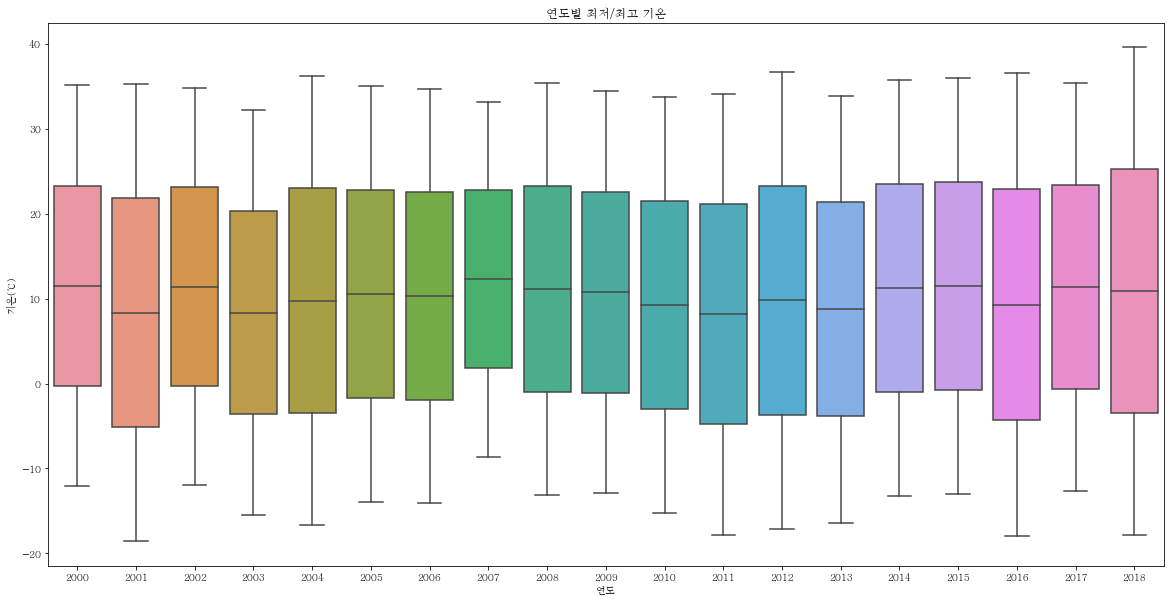

In [28]:
#3번  서울지역의 2000년도~2018년도 날씨 데이터로부터 년도별 가장 높은 날의 기온과  년도별 가장 높은 날의 기온을 변화를 쉽게 파악할 수 있도록  시각화하시오
%matplotlib inline

df.reset_index(inplace = True)
f = lambda x: x.split('-')[0]
df['날짜'] = df['날짜'].apply(f)
df.set_index('날짜', inplace = True)

#연도별 최저/최고 기온 데이터프레임 생성

dict_min_max = {}
for k in df.index:
    dict_min_max[k] = (df.loc[k].min()['최저기온(℃)'], df.loc[k].max()['최고기온(℃)'] )
df_min_max = pd.DataFrame(dict_min_max)

df_min_max.index = ['lowest', 'highest']


import seaborn as sns

path = 'C:\Windows\Fonts\Batang.ttc'
font_name = font_manager.FontProperties(fname = path).get_name()
rc('font', family = font_name)

plt.figure(figsize = (20, 10))
sns.boxplot(data = df_min_max)
plt.title("연도별 최저/최고 기온")
plt.xlabel("연도")
plt.ylabel("기온(℃)")
plt.show()

In [ ]:
#또 다른 방법: unstack(), swaplevel()활용

In [6]:
df.reset_index(inplace = True)
f = lambda x: x.split('-')[0]
df['날짜'] = df['날짜'].apply(f)
df.set_index('날짜', inplace = True)
df.drop(columns = '강수량(mm)', inplace = True)

In [27]:
unstacked_df = df.unstack().swaplevel(0, 1)
for k in range(2000, 2019):
    lowest = unstacked_df[str(k)].min()
    highest = unstacked_df[str(k)].max()
    print(k, lowest, highest)

2000 -12.1 35.1
2001 -18.6 35.3
2002 -12.0 34.8
2003 -15.5 32.2
2004 -16.7 36.2
2005 -14.0 35.0
2006 -14.1 34.7
2007 -8.6 33.2
2008 -13.1 35.4
2009 -12.9 34.4
2010 -15.3 33.8
2011 -17.8 34.1
2012 -17.1 36.7
2013 -16.4 33.9
2014 -13.2 35.8
2015 -13.0 36.0
2016 -18.0 36.6
2017 -12.6 35.4
2018 -17.8 39.6


In [29]:
df_min_max

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
lowest,-12.1,-18.6,-12.0,-15.5,-16.7,-14.0,-14.1,-8.6,-13.1,-12.9,-15.3,-17.8,-17.1,-16.4,-13.2,-13.0,-18.0,-12.6,-17.8
highest,35.1,35.3,34.8,32.2,36.2,35.0,34.7,33.2,35.4,34.4,33.8,34.1,36.7,33.9,35.8,36.0,36.6,35.4,39.6
